In [1]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import cv2

In [110]:
data_folder = "../data"
conditions = ["Viral Pneumonia", "Lung_Opacity", "COVID",  "Normal"]
img_folder = "images"

lst_dirs_condition = [os.path.join(data_folder, cond, "images") for cond in conditions]

list_dir_images = pd.DataFrame({"img_type" : ["Viral Pneumonia", "Bacterial Pneumonia", "Covid", "Normal"],
                                 "img_dir" : lst_dirs_condition})


In [112]:
# data_meta = pd.read_csv(os.path.join(data_folder,"aggregated_metadata.csv"), index_col=0)

In [31]:
def mask_overlay(img, mask):
    mask = cv2.resize(mask, dsize=img.shape)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

In [5]:
def convert_to_vector(img):
    return img.reshape(1,299*299)[0]

In [121]:
def load_img_dir(condition, mask=False):
    if mask==False:
        dir_condition = os.path.join(data_folder, condition, "images")
    else:
        dir_condition = os.path.join(data_folder, condition, "masks")    
    filenames = [name for name in os.listdir(dir_condition)]
    img_list = []
    for i, filename in enumerate(filenames):
        img_list.append(cv2.imread(os.path.join(dir_condition, filename), cv2.IMREAD_GRAYSCALE))
    return img_list

In [146]:
def load_img_dir_in_df(condition, mask=False):
    if mask==False:
        dir_condition = os.path.join(data_folder, condition, "images")
    else:
        dir_condition = os.path.join(data_folder, condition, "masks")       
    filenames = [name for name in os.listdir(dir_condition)]
    img_list = []
    for i, filename in enumerate(filenames):
        img_list.append(cv2.imread(os.path.join(dir_condition, filename), cv2.IMREAD_GRAYSCALE))
    img_list = pd.Series(img_list)
    img_df = pd.DataFrame(img_list.apply(convert_to_vector).apply(pd.Series))
    img_df['label'] = condition
    return img_df

In [206]:
def get_all_masks_size():
    condition = conditions[0]
    dir_condition = os.path.join(data_folder, condition, "masks") 
    filenames = [name for name in os.listdir(dir_condition)]
    part_lungs_size = []
    for i, filename in enumerate(filenames):
        mask = cv2.imread(os.path.join(dir_condition, filename), cv2.IMREAD_GRAYSCALE)
        part_lungs_size.append(np.mean(mask==255))
    df_mean_lungs_size = pd.DataFrame(part_lungs_size, columns=['lung_portion'])
    df_mean_lungs_size['label'] = condition

    for c in range(1,len(conditions)):
        condition = conditions[c] 
        dir_condition = os.path.join(data_folder, condition, "masks") 
        filenames = [name for name in os.listdir(dir_condition)]
        part_lungs_size = []
        for i, filename in enumerate(filenames):
            mask = cv2.imread(os.path.join(dir_condition, filename), cv2.IMREAD_GRAYSCALE)
            part_lungs_size.append(np.mean(mask==255))
        part_lungs_size = pd.DataFrame(part_lungs_size, columns=['lung_portion'])
        part_lungs_size['label'] = condition
        df_mean_lungs_size = pd.concat([df_mean_lungs_size,part_lungs_size], axis=0)
    return df_mean_lungs_size


In [77]:
def load_masked_img_dir(condition):
    dir_condition = os.path.join(data_folder, condition)
    dir_radio_images = os.path.join(dir_condition, "images")
    filenames = [name for name in os.listdir(dir_radio_images)]
    masked_img_list = []
    for i, filename in enumerate(filenames):
        # img = load_bw_img(os.path.join(dir_condition, "images", filename))
        img = cv2.imread(os.path.join(dir_condition, "images", filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(os.path.join(dir_condition, "masks", filename), cv2.IMREAD_GRAYSCALE)
        masked_img_list.append(mask_overlay(img,mask))
    return masked_img_list

In [226]:
def load_masked_img_dir_in_df(condition):
    dir_condition = os.path.join(data_folder, condition)
    dir_radio_images = os.path.join(dir_condition, "images")
    filenames = [name for name in os.listdir(dir_radio_images)]
    masked_img_list = []
    for i, filename in enumerate(filenames):
        # img = load_bw_img(os.path.join(dir_condition, "images", filename))
        img = cv2.imread(os.path.join(dir_condition, "images", filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(os.path.join(dir_condition, "masks", filename), cv2.IMREAD_GRAYSCALE)
        masked_img_list.append(mask_overlay(img,mask))
    masked_img_list = pd.Series(masked_img_list)
    masked_img_df = pd.DataFrame(masked_img_list.apply(convert_to_vector).apply(pd.Series))
    masked_img_df['label'] = condition
    return masked_img_df

count    21165.000000
mean         0.239156
std          0.061974
min          0.029007
25%          0.196075
50%          0.235382
75%          0.277771
max          0.580261
Name: lung_portion, dtype: float64

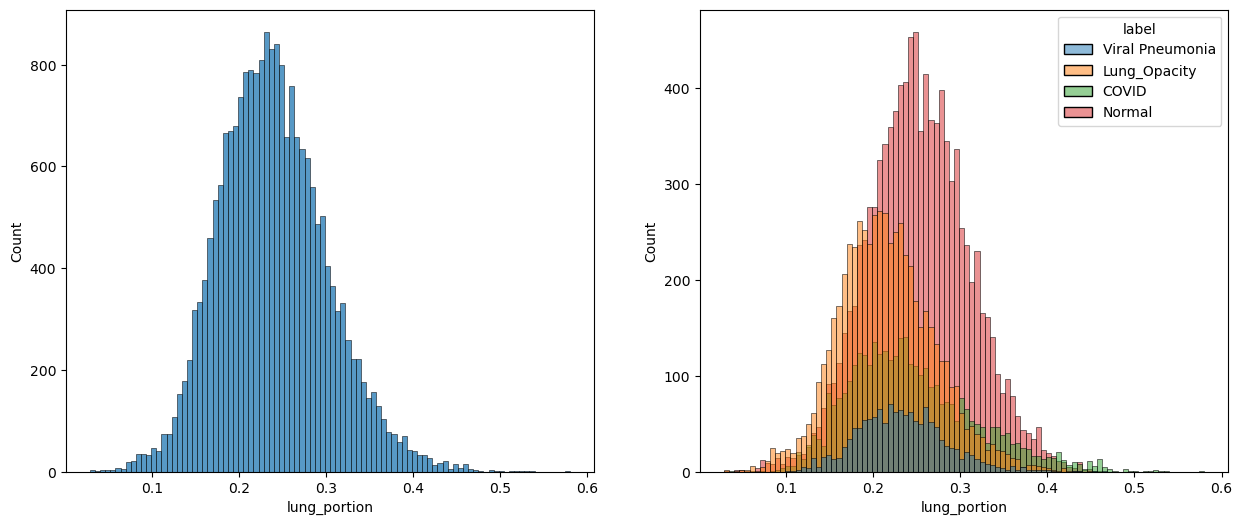

In [ ]:
# mean_lungs_part = pd.read_csv(os.path.join(data_folder,"mean_lungs_img_prop.csv"), index_col=0)

# display(mean_lungs_part.lung_portion.describe())

# plt.figure(figsize=(15,6))
# plt.subplot(121)
# sns.histplot(mean_lungs_part, x='lung_portion')
# plt.subplot(122)
# sns.histplot(mean_lungs_part, x='lung_portion', hue='label');

In [250]:
# masked_im = np.array(masked_pneum.drop(columns='label').iloc[0,:]).reshape(299,299)

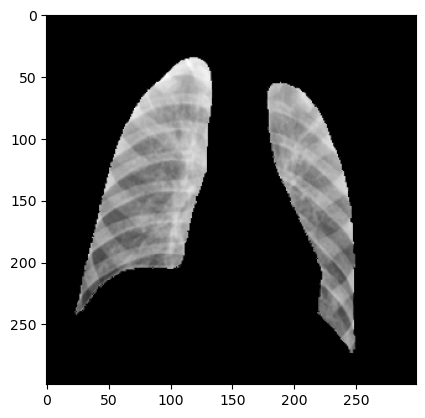

In [251]:
# plt.imshow(masked_im, cmap='gray')

In [404]:
def get_color_distribution(masked_img_asserie):
    masked_im = masked_img_asserie[masked_img_asserie!=0]
    col_distr = pd.DataFrame(masked_im).value_counts(normalize=True).sort_index().transpose()
    null_distrib = pd.DataFrame(np.zeros(255),index=np.arange(1,256)).transpose()
    df_distrib = pd.concat([null_distrib, col_distr], axis=0)
    return df_distrib.reset_index().drop(columns='index').head(-1)

In [405]:
def compute_color_distribution_from_dir_imgs(condition):
    dir_condition = os.path.join(data_folder, condition)
    dir_radio_images = os.path.join(dir_condition, "images")
    filenames = [name for name in os.listdir(dir_radio_images)]
    colors_distrib_dir =  pd.DataFrame(np.zeros(255),index=np.arange(1,256)).transpose()
    for i, filename in enumerate(filenames):
        img = cv2.imread(os.path.join(dir_condition, "images", filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(os.path.join(dir_condition, "masks", filename), cv2.IMREAD_GRAYSCALE)
        masked_img = mask_overlay(img,mask)
        img_col_distr =  get_color_distribution(masked_img)
        colors_distrib_dir = pd.concat([colors_distrib_dir, img_col_distr], axis=0)
    return colors_distrib_dir.head(-1).fillna(0)

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,proportion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003053
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002166
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000689
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000295
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000098
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000295
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000049


In [408]:
compute_color_distribution_from_dir_imgs(test.drop(columns='label'))

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'DataFrame'

In [227]:
# masked_pneum = load_masked_img_dir_in_df(conditions[0])

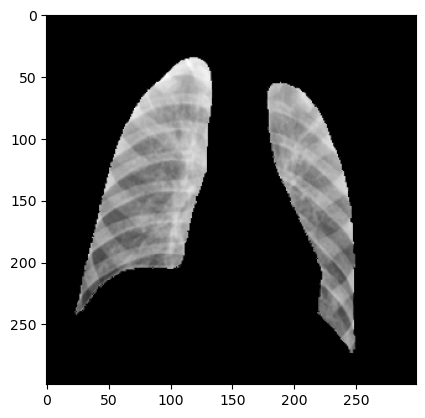

In [106]:
# plt.imshow(np.array(masked_pneum.drop(columns='label').iloc[0,:]).reshape(299,299), cmap='gray')
